In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('earthquake_alert_balanced_dataset (1).csv')

In [4]:
print("Data Shape:", dataset.shape)
print("Column Names:", dataset.columns)


Data Shape: (1300, 6)
Column Names: Index(['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'alert'], dtype='object')


In [5]:
print("Duplicate Rows:", dataset.duplicated().sum())
df = dataset.drop_duplicates()

Duplicate Rows: 44


In [6]:
print("Missing Values per Column:\n", df.isnull().sum())

Missing Values per Column:
 magnitude    0
depth        0
cdi          0
mmi          0
sig          0
alert        0
dtype: int64


In [8]:
dataset=dataset.dropna()

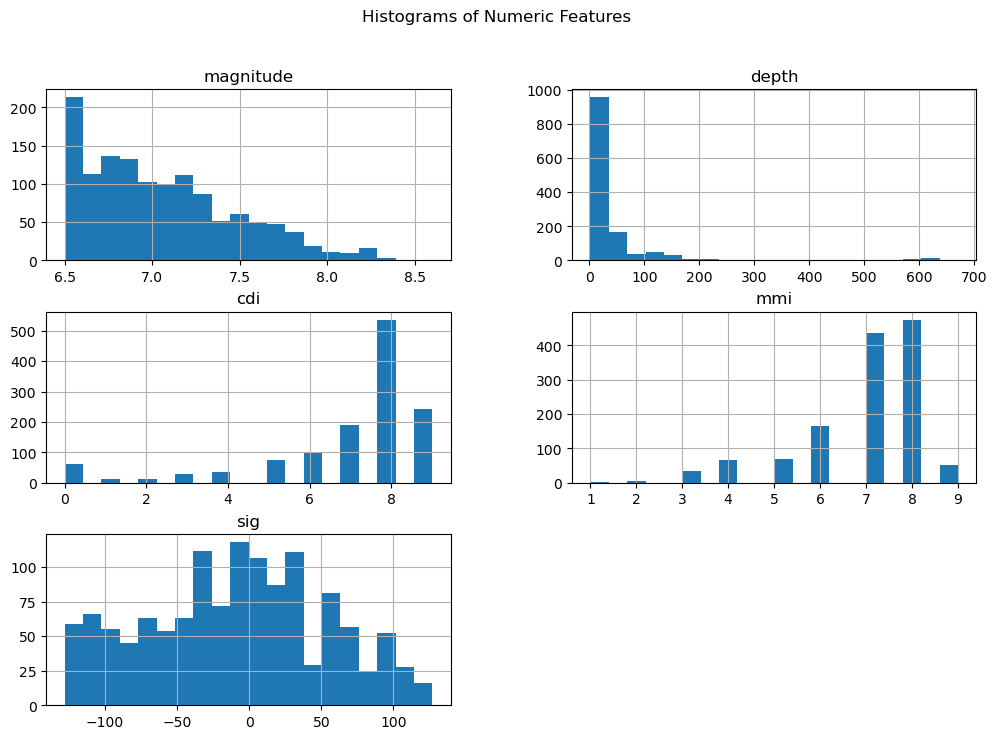

In [9]:
dataset.hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numeric Features")
plt.show()


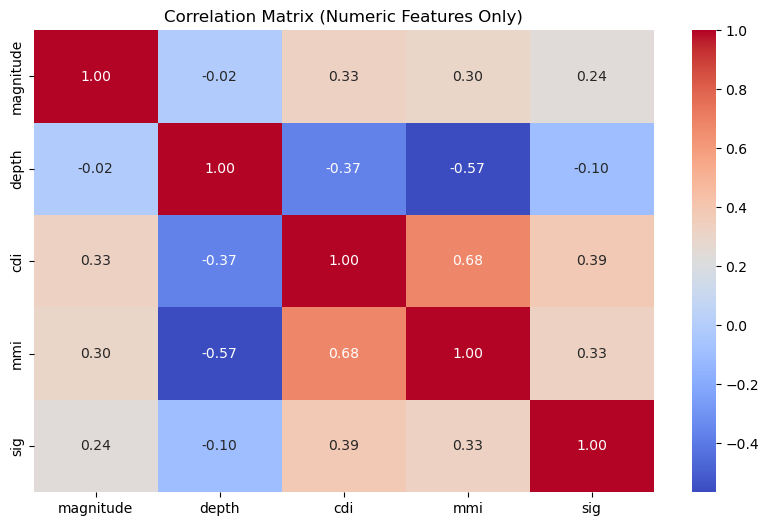

In [10]:
plt.figure(figsize=(10, 6))
numeric_dataset = dataset.select_dtypes(include=['number'])
sns.heatmap(numeric_dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

In [11]:
scaler = StandardScaler()  
scaled_data = scaler.fit_transform(dataset.select_dtypes(include=np.number))

scaled_df = pd.DataFrame(scaled_data, columns=df.select_dtypes(include=np.number).columns)
print("Scaled Data (first 5 rows):\n", scaled_df.head())

Scaled Data (first 5 rows):
    magnitude     depth       cdi       mmi       sig
0  -0.144031 -0.348214  0.456257  0.044873  0.156686
1  -0.380116 -0.242757 -1.326265 -2.170372 -0.373679
2  -0.144031  5.068429 -1.771896 -2.908786 -0.052245
3   0.564227 -0.127713 -0.880635 -1.431957  1.201345
4  -1.088374  5.499843 -3.108788 -3.647201 -1.418338


In [12]:
print(dataset.head())
print(dataset.info())

   magnitude  depth  cdi  mmi   sig  alert
0        7.0   14.0  8.0  7.0   0.0  green
1        6.9   25.0  4.0  4.0 -33.0  green
2        7.0  579.0  3.0  3.0 -13.0  green
3        7.3   37.0  5.0  5.0  65.0  green
4        6.6  624.0  0.0  2.0 -98.0  green
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB
None


In [15]:
X = dataset.iloc[:, :-1]   
y = dataset.iloc[:, -1]   



In [16]:
print("Features (X):")
print(X.head())  
print("\nTarget (y):")
print(y.head())  


Features (X):
   magnitude  depth  cdi  mmi   sig
0        7.0   14.0  8.0  7.0   0.0
1        6.9   25.0  4.0  4.0 -33.0
2        7.0  579.0  3.0  3.0 -13.0
3        7.3   37.0  5.0  5.0  65.0
4        6.6  624.0  0.0  2.0 -98.0

Target (y):
0    green
1    green
2    green
3    green
4    green
Name: alert, dtype: object


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=2000, solver="lbfgs")
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [40]:

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.6282051282051282

Classification Report:
               precision    recall  f1-score   support

       green       0.81      0.77      0.79       104
      orange       0.59      0.35      0.44       103
         red       0.67      0.83      0.74        94
      yellow       0.45      0.57      0.50        89

    accuracy                           0.63       390
   macro avg       0.63      0.63      0.62       390
weighted avg       0.64      0.63      0.62       390


Confusion Matrix:
 [[80  4  3 17]
 [ 0 36 24 43]
 [ 0 13 78  3]
 [19  8 11 51]]


In [41]:
y_prob = model.predict_proba(X_test)
print("Predicted Probabilities:\n", y_prob[:5]) 

Predicted Probabilities:
 [[2.02376058e-03 3.76979848e-01 5.29142608e-01 9.18537832e-02]
 [3.09642293e-03 2.49867631e-01 6.64966825e-01 8.20691207e-02]
 [9.92341582e-01 1.08598672e-05 4.11846982e-07 7.64714613e-03]
 [3.81227810e-03 6.11123780e-01 2.35843963e-01 1.49219979e-01]
 [5.88156533e-03 3.88061664e-01 4.43008344e-01 1.63048426e-01]]


In [45]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree


In [47]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)



In [52]:

y_pred = model.predict(X_test)


In [53]:
print("Decision Tree model trained successfully!")
print("Number of features:", model.n_features_in_)
print("Classes:", model.classes_)


Decision Tree model trained successfully!
Number of features: 5
Classes: ['green' 'orange' 'red' 'yellow']


In [54]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



 Accuracy: 0.7666666666666667
 Classification Report:
               precision    recall  f1-score   support

       green       0.94      0.80      0.86       104
      orange       0.70      0.60      0.65       103
         red       0.70      0.97      0.81        94
      yellow       0.75      0.71      0.73        89

    accuracy                           0.77       390
   macro avg       0.77      0.77      0.76       390
weighted avg       0.78      0.77      0.76       390

 Confusion Matrix:
 [[83 11  2  8]
 [ 0 62 30 11]
 [ 0  1 91  2]
 [ 5 14  7 63]]


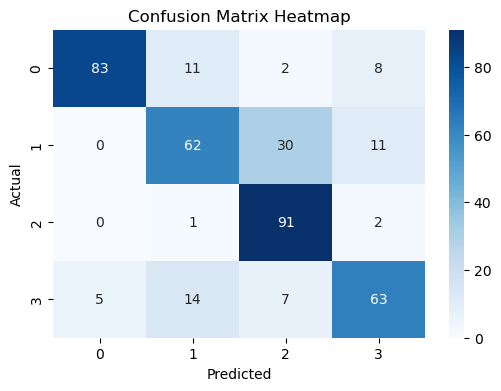

In [55]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

knn = KNeighborsClassifier(n_neighbors=5)  # you can tune n_neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [61]:
print(" K-Nearest Neighbours Performance")


 K-Nearest Neighbours Performance


In [62]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


Accuracy: 0.7076923076923077


In [63]:
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


Classification Report:
               precision    recall  f1-score   support

       green       0.75      0.49      0.59       104
      orange       0.68      0.75      0.71       103
         red       0.82      0.80      0.81        94
      yellow       0.63      0.82      0.71        89

    accuracy                           0.71       390
   macro avg       0.72      0.71      0.71       390
weighted avg       0.72      0.71      0.70       390



In [66]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", probability=True)  
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)




In [67]:
print(" Support Vector Machine Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:", classification_report(y_test, y_pred_svm))


 Support Vector Machine Performance
Accuracy: 0.46923076923076923
Classification Report:               precision    recall  f1-score   support

       green       0.61      0.45      0.52       104
      orange       0.36      0.41      0.38       103
         red       0.45      0.69      0.54        94
      yellow       0.59      0.33      0.42        89

    accuracy                           0.47       390
   macro avg       0.50      0.47      0.47       390
weighted avg       0.50      0.47      0.47       390

